Так как датасет при загрузке по ссылке вследствие работы файловой системы ОС меняет формат и теряет часть данных, то подгружать его будем из sklearn.datasets, откуда он, судя по всему, и взят изначально

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from scipy import stats

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

df = df.rename(columns={
    'mean radius': 'radius_mean',
    'mean area': 'area_mean',
    'mean perimeter': 'perimeter_mean',
    'mean symmetry': 'symmetry_mean',
    'mean texture': 'texture_mean'
})



In [14]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,mean smoothness,mean compactness,mean concavity,mean concave points,symmetry_mean,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Задание 1: Регрессионный анализ

Регрессионный анализ использует линейные и полиномиальные модели для выявления связей между признаками. Графики показывают, как площадь и периметр сильно коррелируют с радиусом, тогда как симметричность имеет слабую связь.


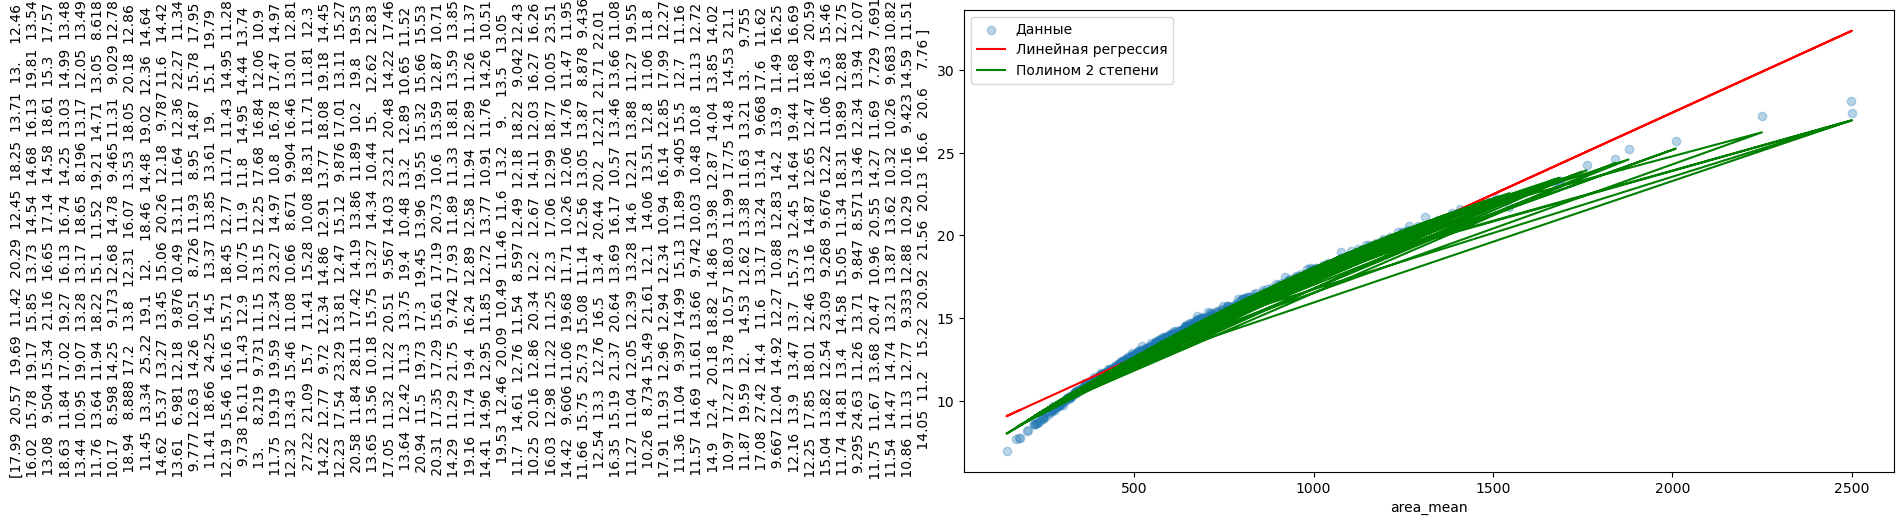

Линейная модель R²: 0.975
Полиномиальная модель R²: 0.996


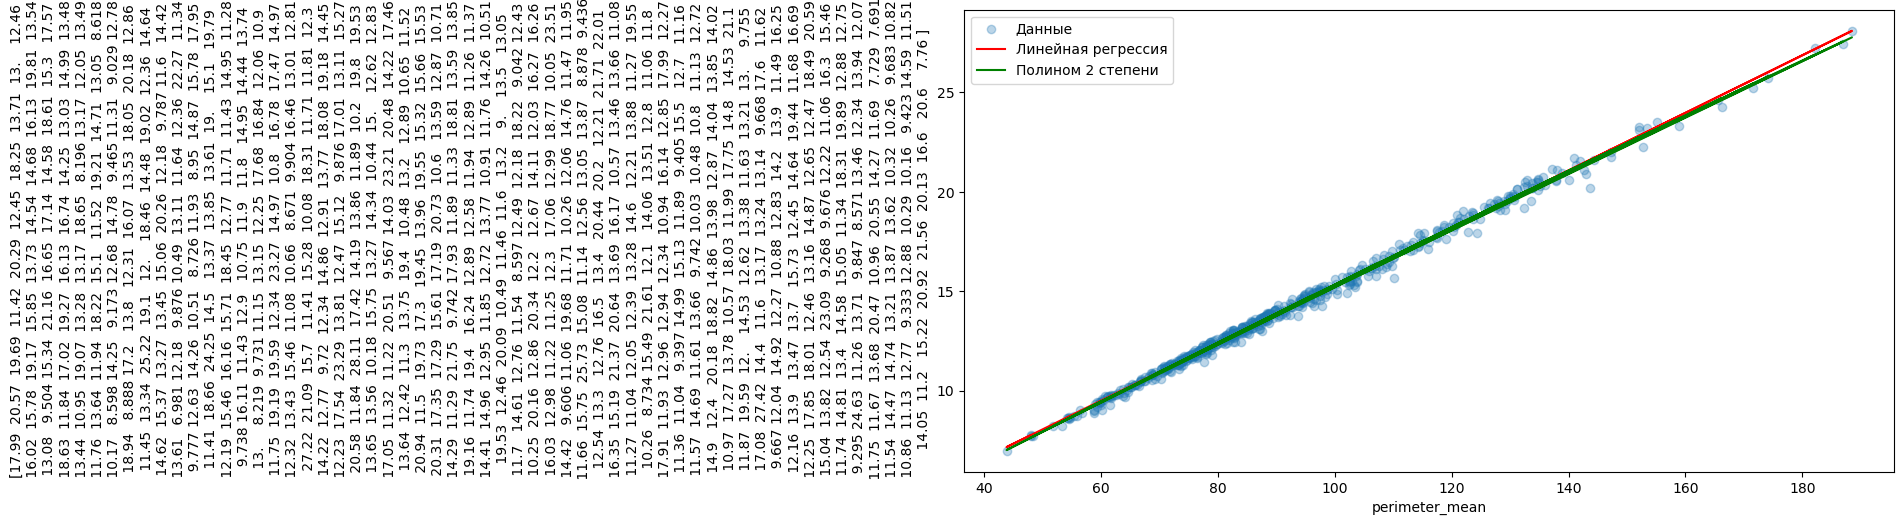

Линейная модель R²: 0.996
Полиномиальная модель R²: 0.996


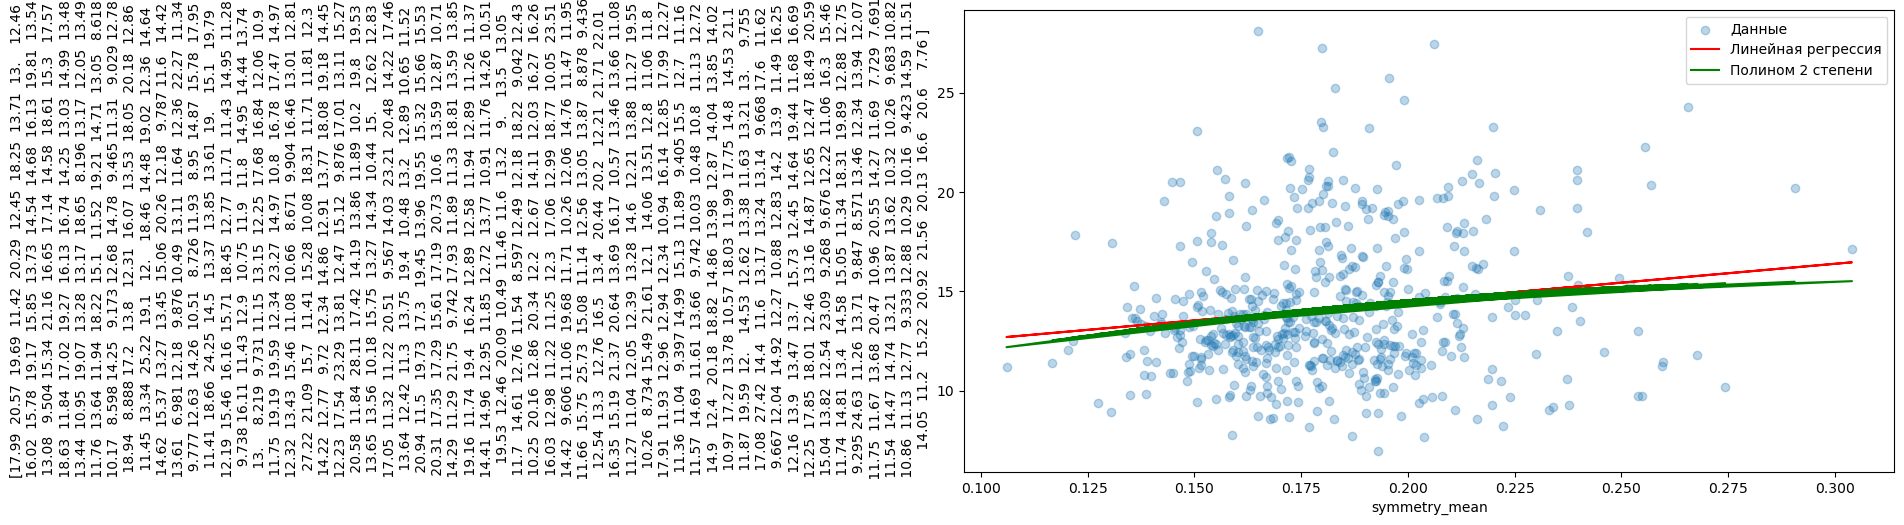

Линейная модель R²: 0.022
Полиномиальная модель R²: 0.023


In [12]:
# Функция для построения регрессии и графиков
def plot_regression(x, y, degree=1):
    X = df[[x]].values
    y = df[y].values
    
    # Линейная регрессия
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    
    # Полиномиальная регрессия
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y)
    y_poly_pred = lr_poly.predict(X_poly)
    
    # Графики
    plt.figure(figsize=(12,6))
    plt.scatter(X, y, alpha=0.3, label='Данные')
    plt.plot(X, y_pred, color='red', label='Линейная регрессия')
    plt.plot(X, y_poly_pred, color='green', label=f'Полином {degree} степени')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    
    # Метрики
    print(f"Линейная модель R²: {r2_score(y, y_pred):.3f}")
    print(f"Полиномиальная модель R²: {r2_score(y, y_poly_pred):.3f}")

# Анализ связей
plot_regression('area_mean', 'radius_mean', degree=2)
plot_regression('perimeter_mean', 'radius_mean', degree=2)
plot_regression('symmetry_mean', 'radius_mean', degree=2)


# Задание 2: Логистическая регрессия


Логистическая регрессия демонстрирует прогностическую способность признаков через ROC-кривую и важность признаков. AUC > 0.9 указывает на хорошее качество модели.


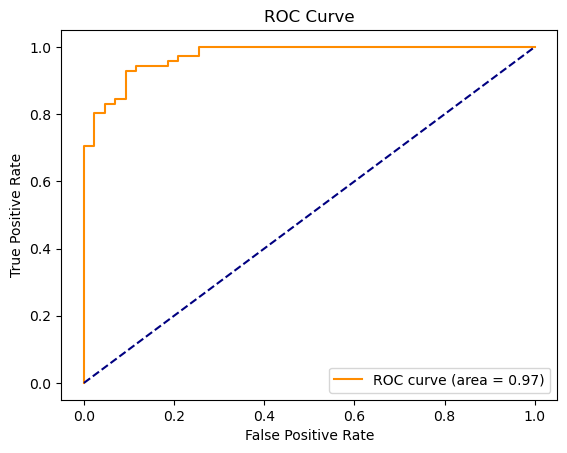

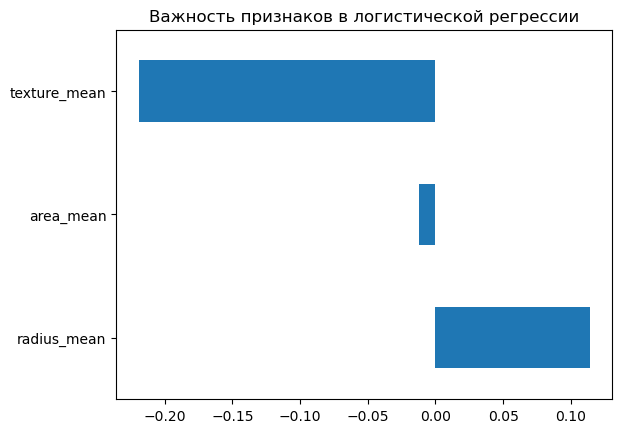

In [18]:
X = df[['radius_mean', 'area_mean', 'texture_mean']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Прогнозирование
y_proba = logreg.predict_proba(X_test)[:, 1]
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


pd.Series(logreg.coef_[0], index=X.columns).plot(kind='barh')
plt.title('Важность признаков в логистической регрессии')
plt.show()


# Задание 3: Расчет размера выборки для регрессии Кокса


Расчет выборки по формуле Шенфилда для регрессии Кокса показывает, что для обнаружения HR=2 с мощностью 80% требуется > 100 пациентов.

In [20]:
def calculate_sample_size(hr, alpha=0.05, power=0.8, p_event=0.8):
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(power)
    
    d = (z_alpha + z_beta)**2 / (p_event * (1 - p_event) * (np.log(hr))**2)
    n = d / p_event
    
    return int(np.ceil(n))

# Параметры исследования
hr = 2
sample_size = calculate_sample_size(hr)
print(f"Требуемый размер выборки: {sample_size} пациентов")


Требуемый размер выборки: 128 пациентов


In [28]:
# Дополнительная проверка для задания 1 (аналитическая формула)
df['radius_calculated'] = np.sqrt(df['area_mean'] / np.pi)
print(f"R² аналитической формулы: {r2_score(df['radius_mean'], df['radius_calculated']):.3f}")


R² аналитической формулы: 0.998
